[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mosleh-exeter/BEM1025/blob/main/Lecture/07-Lecture07-Functions.ipynb)

# Session 8 Functions

### Learning about apply is fundamental in the data cleaning process. It also encapsulates key concepts in programming, mainly writing functions. apply takes a function and “applies” (i.e., runs it) across each row or column of a dataframe “simultaneously.” If you’ve programmed before, then the concept of an “apply” should be familiar. It is similar to writing a for loop across each row or column and calling the function—apply just does it simultaneously. In general, this is the preferred way to apply functions across dataframes, because it typically is much faster than writing a for loop in Python



## This lab will cover:

1. Functions in Python
2. Lambda functions
3. Applying functions on pandas dataframes

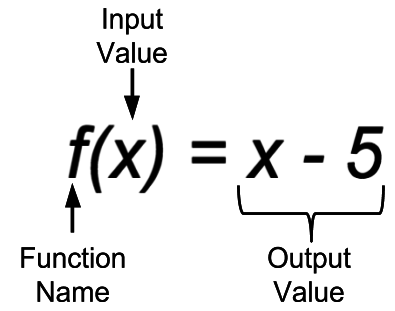


In [9]:
import pandas as pd
import numpy as np

# Functions in python

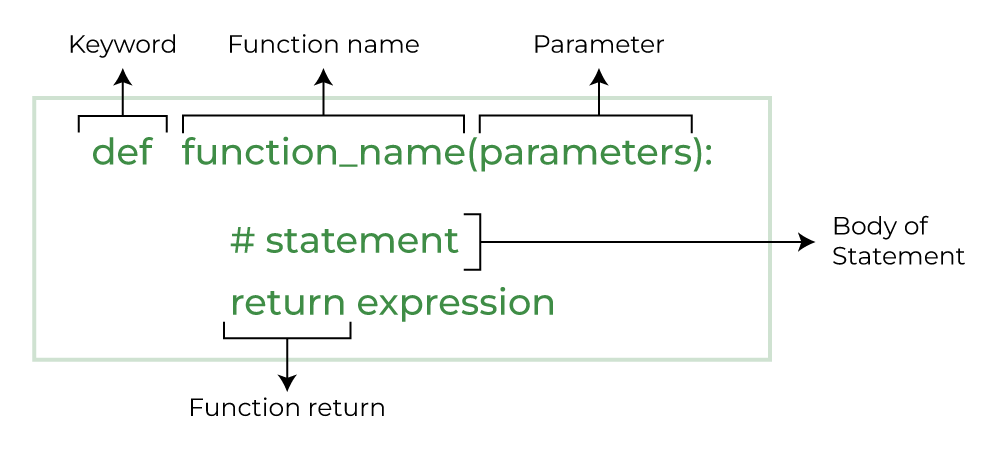

### Single input / Single output function

In [52]:
# The following function takes x as an argument, squares it and returns the result
def my_function1(x):
    y= x**2
    
    return y

In [53]:
my_function1(3)

9

In [54]:
my_function1(45)

2025

### Multiple inputs / Single output function

In [55]:
# The following function takes x,y as arguments, computes the average and returns the result

def my_function2(x1,x2):
    y= (x1+x2)/2
    
    return y

In [56]:
my_function2(4,6)

5.0

In [57]:
my_function2(15,45)

30.0

### Single input / Multiple outputs function

In [58]:
def my_function3(x):
    y1=x/10
    y2=x/100
    
    return y1,y2

In [59]:
my_function3(5)

(0.5, 0.05)

### Multiple inputs / Multiple outputs function

In [60]:
def my_function4(x1,x2):
    y1=(x1+x2)/2
    y2=(x1-x2)/2
    
    return y1,y2

In [61]:
my_function4(10,20)

(15.0, -5.0)

In [62]:
def my_date_extractor(input_string):
    year=input_string[0:10]
    return year
    

In [63]:
date='2019-06-21 00:00:00+00:00'

In [64]:
my_date_extractor(date)

'2019-06-21'

# Lambda functions in python
learn more about lambda functions: https://www.w3schools.com/python/python_lambda.asp

Sometimes the function used in the apply method is simple enough that there is no need to create a separate function.

Lambda functions are extremely useful to process data in pandas-based environments !!

### A lambda function is a small anonymous function.

### A lambda function can take any number of arguments, but can only have one expression.

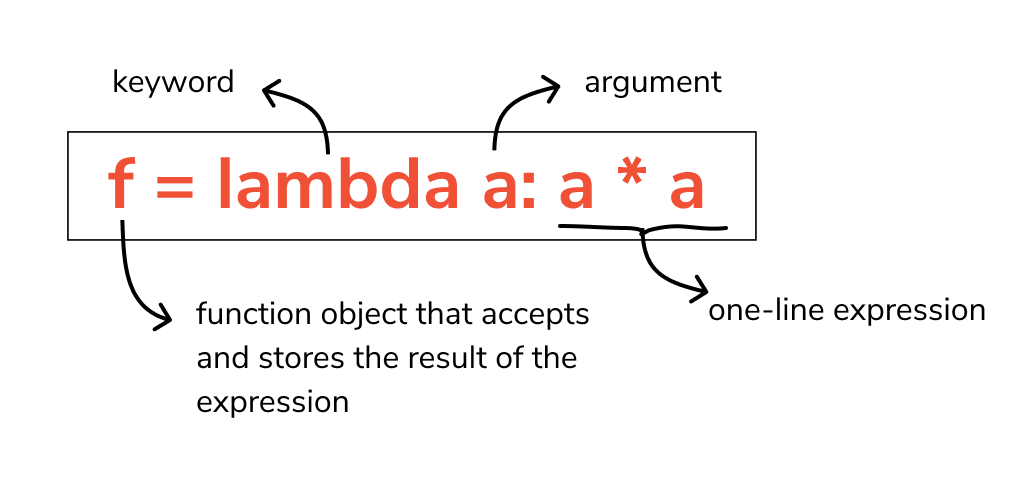

In [65]:
lambda_add = lambda x, y: x + y

In [66]:
lambda_add(3,4)

7

In [67]:
lambda_add(5,7)

12

In [68]:
lambda_mean= lambda x,y:(x+y)/2

In [69]:
lambda_mean(0,10)

5.0

In [70]:
lambda_date_extractor = lambda date:date[0:10]

In [71]:
lambda_date_extractor('2019-06-21 00:00:00+00:00')

'2019-06-21'

# Apply functions in pandas

### How to use functions in Pandas? 
When working with dataframes, it’s more likely that you want to use a function across rows or columns of your data.

In [72]:
air_quality_no2 = pd.read_csv('https://www.dropbox.com/s/70230oct6p0ovnv/air_quality_no2_long.csv?dl=1',parse_dates=True)

In [73]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


## Pandas Apply

Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1).

Read more: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

"Apply" is useful to process dataframes using your own functions

#### Apply function to a single column

In [74]:
air_quality_no2['valuesquared']=air_quality_no2['value']\
                                .apply(my_sqare_function)

In [75]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit,valuesquared
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,400.00
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,475.24
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,702.25
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,620.01
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,457.96


In [76]:
air_quality_no2['date']=air_quality_no2['date.utc'].\
                        apply(my_date_extractor)

In [77]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit,valuesquared,date
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,400.00,2019-06-21
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,475.24,2019-06-20
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,702.25,2019-06-20
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,620.01,2019-06-20
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,457.96,2019-06-20


Using Apply with built-in functions

It is possible to use apply with python built-in functions

In [81]:
air_quality_no2['value'].apply(np.sqrt).head()

0    4.472136
1    4.669047
2    5.147815
3    4.989990
4    4.626013
Name: value, dtype: float64

#### Apply function to a mutliple columns

We can apply a function to multiple columns, here we don't need to specity the column but need to specify axis=1 such that we can apply function to the columns not rows

We need to specify the columns inside the function

In [87]:
def my_funct(row):
    output=row['country']+'-'+row['city']+'-'+row['location']
    return output
air_quality_no2['full_location']=air_quality_no2.apply(my_funct,axis=1)
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit,valuesquared,date,full_location
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,400.00,2019-06-21,FR-Paris-FR04014
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,475.24,2019-06-20,FR-Paris-FR04014
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,702.25,2019-06-20,FR-Paris-FR04014
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,620.01,2019-06-20,FR-Paris-FR04014
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,457.96,2019-06-20,FR-Paris-FR04014


## Using Apply with lambda functions

Similar to regular functions, we can use lambda as one line expression to create and apply functions in pandas

In [89]:
# Let's extract year, month and day from date.utc column 
air_quality_no2['date'].apply(lambda date:date[0:10]).head()

0    2019-06-21
1    2019-06-20
2    2019-06-20
3    2019-06-20
4    2019-06-20
Name: date, dtype: object

In [90]:
air_quality_no2['value'].apply(lambda value:value**2).head()

0    400.00
1    475.24
2    702.25
3    620.01
4    457.96
Name: value, dtype: float64

In [91]:
air_quality_no2.apply(lambda row:row['country']+'-'+row['city']+'-'+row['location'],axis=1).head()

0    FR-Paris-FR04014
1    FR-Paris-FR04014
2    FR-Paris-FR04014
3    FR-Paris-FR04014
4    FR-Paris-FR04014
dtype: object

### Additional material: https://www.youtube.com/watch?v=smPLY_5gVv4